In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from google.colab import files
uploaded = files.upload()


Saving ministries_budget.xlsx to ministries_budget (1).xlsx


In [32]:
data = pd.read_excel('ministries_budget.xlsx')
data.head()

,Ministry/Department,2024-25,2023-24,2022-23,2021-22,2020-21,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14
0,Ministry of Agriculture and Farmers Welfare,132469.86,125035.79,132513.62,131531.19,142762.35,129585.21,58080.00,51026.00,45035.20,24909.78,31542.95,30223.88
1,DEPARTMENT OF ATOMIC ENERGY,24968.98,25078.49,22723.58,18264.89,18228.94,24167.89,21518.38,12461.20,18682.48,10912.00,13995.75,14990.46
2,MINISTRY OF AYUSH,3712.49,3647.50,3050.00,2970.30,2122.08,2245.76,2130.80,1428.65,1326.20,1214.00,1272.15,1259.00
3,MINISTRY OF CHEMICALS AND FERTILISERS,168499.87,178481.99,107715.38,80714.94,71896.92,78515.00,73946.57,70578.45,74552.77,73562.00,77718.55,72454.54
4,MINISTRY OF CIVIL AVIATION,2357.14,3113.36,10667.00,3224.67,3797.71,4500.00,6602.86,2702.00,2590.72,3341.50,7378.02,5882.22


In [33]:
data.describe()

,2024-25,2023-24,2022-23,2021-22,2020-21,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14
count,5.600000e+01,5.600000e+01,5.600000e+01,5.500000e+01,5.500000e+01,5.400000e+01,53.000000,52.000000,51.000000,50.000000,51.000000,51.000000
mean,8.608467e+04,8.041245e+04,7.044480e+04,6.333156e+04,5.531327e+04,6.104842e+04,45714.869811,39887.303269,38496.956863,34849.991800,34657.100392,33367.799020
std,2.631114e+05,2.407488e+05,2.175095e+05,1.982394e+05,1.692778e+05,1.748451e+05,134653.067992,114347.217007,112103.544411,105213.848967,100918.916542,101518.989228
min,6.400000e+01,6.300000e+01,4.700000e+01,3.925000e+01,5.052000e+01,1.938000e+01,18.860000,17.880000,17.300000,15.570000,14.350000,13.280000
25%,3.153630e+03,3.109420e+03,2.906492e+03,2.062005e+03,2.310955e+03,2.304960e+03,2130.800000,1823.827500,1591.160000,1541.712500,2106.855000,1500.785000
50%,9.470570e+03,8.399310e+03,8.695890e+03,5.753000e+03,5.753000e+03,6.657480e+03,6000.000000,5062.530000,4752.830000,4547.005000,5697.430000,4951.680000
75%,4.021329e+04,4.986369e+04,3.801657e+04,3.950800e+04,3.668975e+04,3.738820e+04,31100.550000,23860.395000,18295.300000,21174.182500,18284.810000,17715.230000
max,1.858159e+06,1.689719e+06,1.538779e+06,1.386273e+06,1.168937e+06,1.172770e+06,894706.820000,740168.990000,723460.840000,679960.980000,682345.000000,673885.250000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ministry/Department  56 non-null     object 
 1   2024-25              56 non-null     float64
 2   2023-24              56 non-null     float64
 3   2022-23              56 non-null     float64
 4   2021-22              55 non-null     float64
 5   2020-21              55 non-null     float64
 6   2019-20              54 non-null     float64
 7   2018-19              53 non-null     float64
 8   2017-18              52 non-null     float64
 9   2016-17              51 non-null     float64
 10  2015-16              50 non-null     float64
 11  2014-15              51 non-null     float64
 12  2013-14              51 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.8+ KB


In [35]:
data.duplicated().sum()

0

In [36]:
data.isna().sum()

,0
Ministry/Department,0
2024-25,0
2023-24,0
2022-23,0
2021-22,1
2020-21,1
2019-20,2
2018-19,3
2017-18,4
2016-17,5


In [37]:
# Apply forward-fill to handle missing values
data_cleaned = data.fillna(method='ffill')

# Verify if all missing values are filled
missing_values_summary = data_cleaned.isnull().sum()

# Display the cleaned data and missing value summary
data_cleaned.head(), missing_values_summary


<ipython-input-37-544a0a7ecb9a>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned = data.fillna(method='ffill')


(                           Ministry/Department   2024-25    2023-24   \
 0  Ministry of Agriculture and Farmers Welfare  132469.86  125035.79   
 1                  DEPARTMENT OF ATOMIC ENERGY   24968.98   25078.49   
 2                            MINISTRY OF AYUSH    3712.49    3647.50   
 3        MINISTRY OF CHEMICALS AND FERTILISERS  168499.87  178481.99   
 4                  MINISTRY OF CIVIL AVIATION     2357.14    3113.36   
 
     2022-23    2021-22    2020-21    2019-20   2018-19   2017-18    2016-17  \
 0  132513.62  131531.19  142762.35  129585.21  58080.00  51026.00  45035.20   
 1   22723.58   18264.89   18228.94   24167.89  21518.38  12461.20  18682.48   
 2    3050.00    2970.30    2122.08    2245.76   2130.80   1428.65   1326.20   
 3  107715.38   80714.94   71896.92   78515.00  73946.57  70578.45  74552.77   
 4   10667.00    3224.67    3797.71    4500.00   6602.86   2702.00   2590.72   
 
     2015-16   2014-15   2013-14  
 0  24909.78  31542.95  30223.88  
 1  1091

In [38]:
years = data_cleaned.columns[1:]
for year in years:
    print(f"\nTop 5 Ministries by Budget Allocation in {year}:")
    top_5 = data_cleaned[['Ministry/Department', year]].sort_values(by=year, ascending=False).head(5)
    print(top_5)

    print(f"\nBottom 5 Ministries by Budget Allocation in {year}:")
    bottom_5 = data_cleaned[['Ministry/Department', year]].sort_values(by=year).head(5)
    print(bottom_5)
    print("-" * 50)


Top 5 Ministries by Budget Allocation in 2024-25 :
                                  Ministry/Department    2024-25 
19                                MINISTRY OF FINANCE  1858158.52
12                                MINISTRY OF DEFENCE   621940.95
43            MINISTRY OF ROAD TRANSPORT AND HIGHWAYS   278000.00
42                               MINISTRY OF RAILWAYS   255393.00
8   MINISTRY OF CONSUMER AFFAIRS, FOOD AND PUBLIC ...   223323.36

Bottom 5 Ministries by Budget Allocation in 2024-25 :
                  Ministry/Department  2024-25 
35  MINISTRY OF PARLIAMENTARY AFFAIRS     64.00
5                    MINISTRY OF COAL    192.55
50                  MINISTRY OF STEEL    325.66
38               MINISTRY OF PLANNING    837.26
9             MINISTRY OF COOPERATION   1183.39
--------------------------------------------------

Top 5 Ministries by Budget Allocation in 2023-24 :
                                  Ministry/Department    2023-24 
19                                MINIST

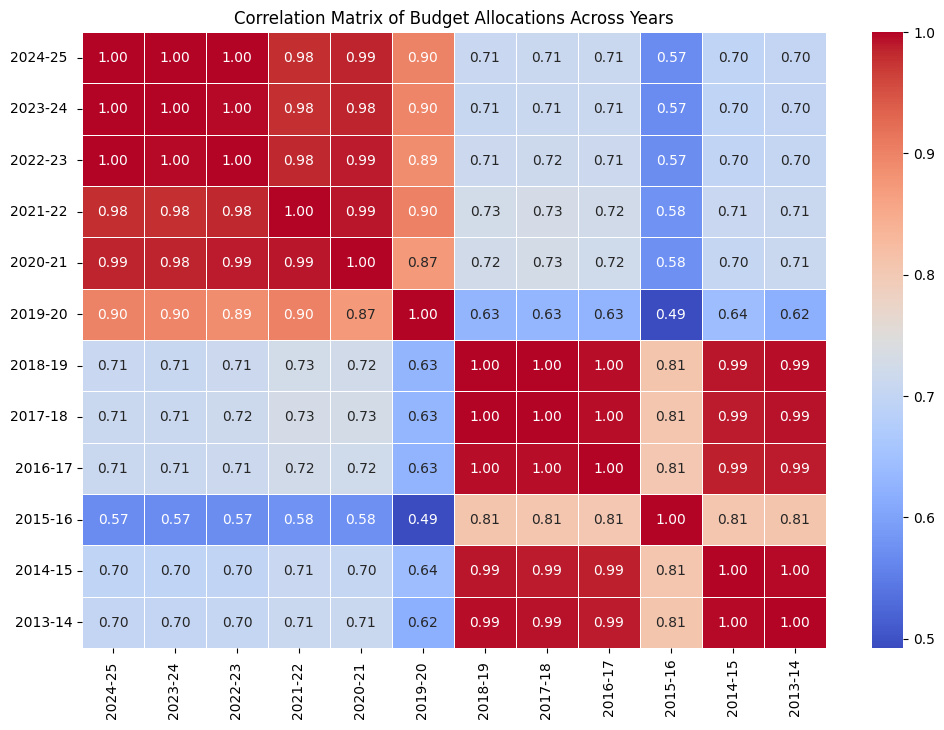

In [39]:
numeric_data = data_cleaned.drop('Ministry/Department', axis=1)

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Budget Allocations Across Years')
plt.show()

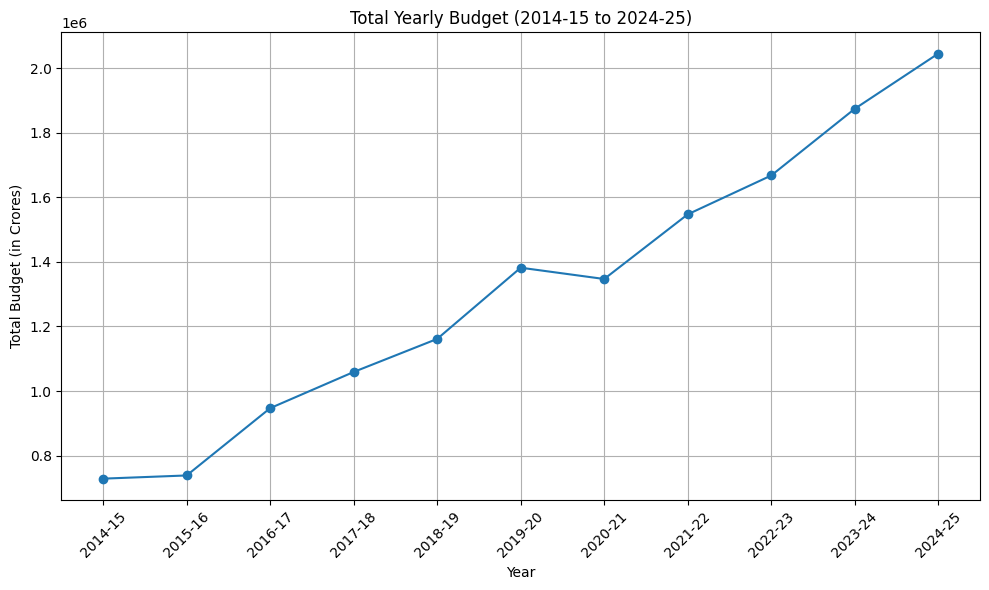

In [43]:
years = [
    '2014-15', '2015-16', '2016-17', '2017-18',
    '2018-19', '2019-20', '2020-21', '2021-22',
    '2022-23', '2023-24', '2024-25'
]
total_budget = [
    728827.07, 738695.09, 947108.94, 1059176.64,
    1161571.66, 1382042.21, 1347079.80, 1547276.05,
    1667592.65, 1874141.24, 2045113.48
]

plt.figure(figsize=(10, 6))
plt.plot(years, total_budget, marker='o')
plt.title('Total Yearly Budget (2014-15 to 2024-25)')
plt.xlabel('Year')
plt.ylabel('Total Budget (in Crores)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Available ministries: ['Ministry of Agriculture and Farmers Welfare'
 'DEPARTMENT OF ATOMIC ENERGY' 'MINISTRY OF AYUSH'
 'MINISTRY OF CHEMICALS AND FERTILISERS' 'MINISTRY OF CIVIL AVIATION '
 'MINISTRY OF COAL' 'MINISTRY OF COMMERCE AND INDUSTRY'
 'MINISTRY OF COMMUNICATIONS'
 'MINISTRY OF CONSUMER AFFAIRS, FOOD AND PUBLIC DISTRIBUTION'
 'MINISTRY OF COOPERATION' 'MINISTRY OF CORPORATE AFFAIRS'
 'MINISTRY OF CULTURE' 'MINISTRY OF DEFENCE'
 'MINISTRY OF DEVELOPMENT OF NORTH EASTERN REGION'
 'MINISTRY OF EARTH SCIENCES' 'MINISTRY OF EDUCATION'
 'MINISTRY OF ELECTRONICS AND INFORMATION TECHNOLOGY'
 'MINISTRY OF ENVIRONMENT, FORESTS AND CLIMATE CHANGE'
 'MINISTRY OF EXTERNAL AFFAIRS' 'MINISTRY OF FINANCE'
 'MINISTRY OF FISHERIES, ANIMAL HUSBANDRY AND DAIRYING'
 'MINISTRY OF FOOD PROCESSING INDUSTRIES'
 'MINISTRY OF HEALTH AND FAMILY WELFARE' 'MINISTRY OF HEAVY INDUSTRIES'
 'MINISTRY OF HOME AFFAIRS' 'MINISTRY OF HOUSING AND URBAN AFFAIRS'
 'MINISTRY OF INFORMATION AND BROADCASTING' 'MINIST

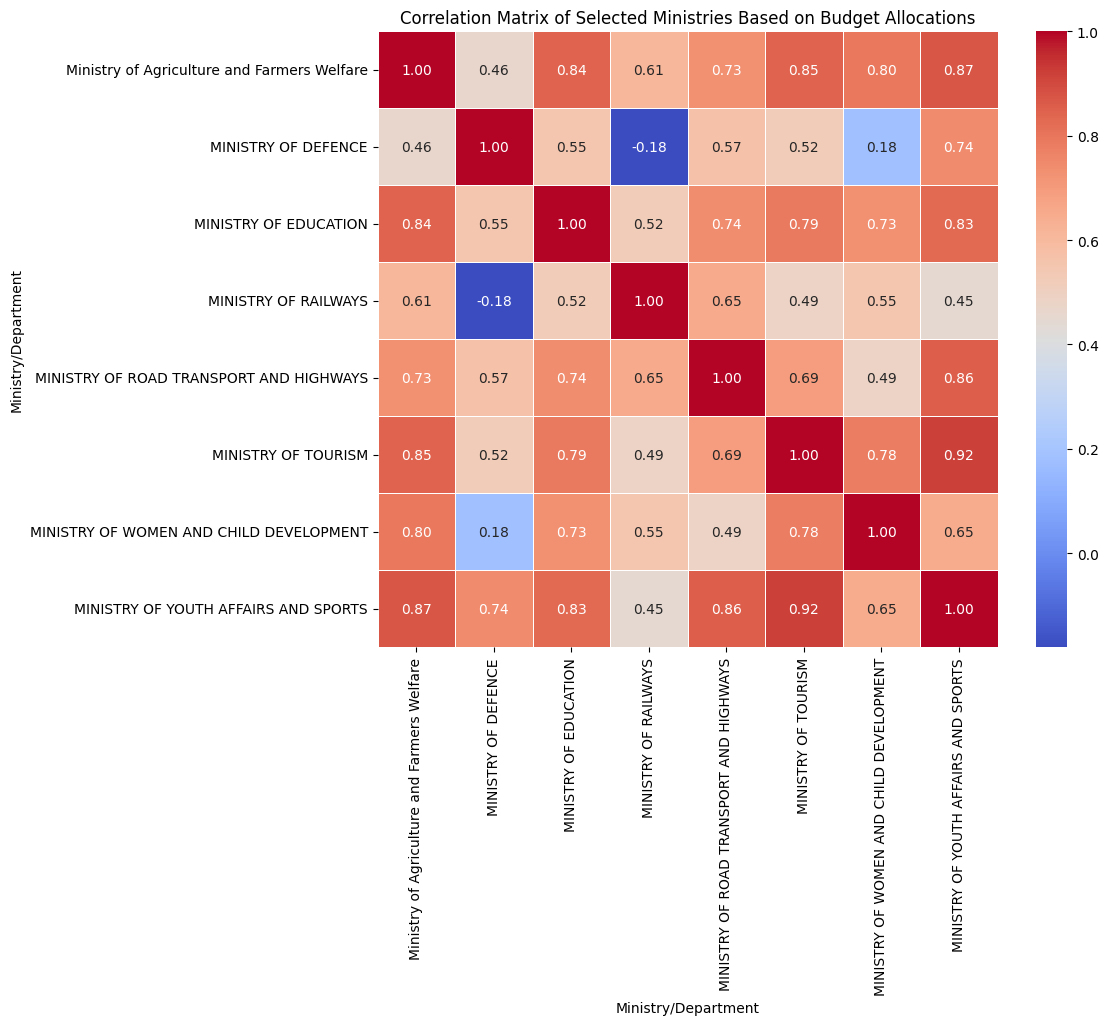

In [16]:
selected_ministries = [
    'Ministry of Agriculture and Farmers Welfare',
    'MINISTRY OF DEFENCE',
    'MINISTRY OF EDUCATION',
    'MINISTRY OF RAILWAYS',
    'MINISTRY OF ROAD TRANSPORT AND HIGHWAYS',
    'MINISTRY OF TOURISM',
    'MINISTRY OF WOMEN AND CHILD DEVELOPMENT',
    'MINISTRY OF YOUTH AFFAIRS AND SPORTS'
]

# Check available columns to ensure proper filtering
print("Available ministries:", data_cleaned['Ministry/Department'].unique())

# Filter the DataFrame for selected ministries
filtered_data = data_cleaned[data_cleaned['Ministry/Department'].isin(selected_ministries)]

# Set 'Ministry/Department' as the index and drop it for numeric calculations
ministry_data = filtered_data.set_index('Ministry/Department').T

# Compute the correlation matrix for selected ministries
ministry_corr_matrix = ministry_data.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(ministry_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Ministries Based on Budget Allocations')
plt.show()

In [20]:
csv_file_name = 'cleaned_data.csv'

# Save the DataFrame to a CSV file
data_cleaned.to_csv(csv_file_name)

print(f"DataFrame saved to {csv_file_name}")
files.download('cleaned_data.csv')

DataFrame saved to cleaned_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
uploaded = files.upload()


Saving cleaned_data.csv to cleaned_data (1).csv


In [22]:
data = {
    "Ministry/Department": [
        "Ministry of Agriculture and Farmers Welfare",
        "MINISTRY OF DEFENCE",
        "MINISTRY OF EDUCATION",
        "MINISTRY OF RAILWAYS",
        "MINISTRY OF ROAD TRANSPORT AND HIGHWAYS",
        "MINISTRY OF TOURISM",
        "MINISTRY OF WOMEN AND CHILD DEVELOPMENT",
        "MINISTRY OF YOUTH AFFAIRS AND SPORTS"
    ],
    "2024-25": [132469.86, 621940.95, 120627.87, 255393, 278000, 2479.62, 26092.19, 3442.32],
    "2023-24": [125035.79, 593537.64, 112899.47, 241267.51, 270434.71, 2400, 25448.75, 3397.32],
    "2022-23": [132513.62, 525166.15, 104277.72, 140367.13, 199107.71, 2400, 25172.28, 3062.6],
    "2021-22": [131531.19, 478195.62, 93224.31, 110054.64, 118101, 2026.77, 24435, 2596.14],
    "2020-21": [142762.35, 471378, 99311.52, 72215.63, 91823.22, 2499.83, 30007.1, 2826.92],
    "2019-20": [129585.21, 37827.16, 97585.76, 500140.23, 164448.98, 2189.22, 29664.9, 2216.92],
    "2018-19": [58080, 404364.71, 85010.29, 55088, 71000, 2150, 24700, 2196.35],
    "2017-18": [51026, 359854.12, 79685.95, 55000, 64900, 1840.77, 22094.67, 1943.21],
    "2016-17": [45035.2, 340921.98, 72394, 52013, 107576, 1590.32, 17908.12, 1592],
    "2015-16": [24909.78, 310079.6, 1619.7, 50175, 45751.65, 1573.07, 10382.4, 1541.13],
    "2014-15": [31542.95, 218654.64, 1702.23, 48262, 57095.64, 1966.71, 21193.88, 1769],
    "2013-14": [30223.88, 271076.13, 1693.73, 26000, 48866.23, 1357.3, 20440, 1219]
}

data_cleaned = pd.DataFrame(data)

# Set 'Ministry/Department' as the index
data_cleaned.set_index('Ministry/Department', inplace=True)

# Transpose the DataFrame for easier plotting
ministry_data = data_cleaned.T

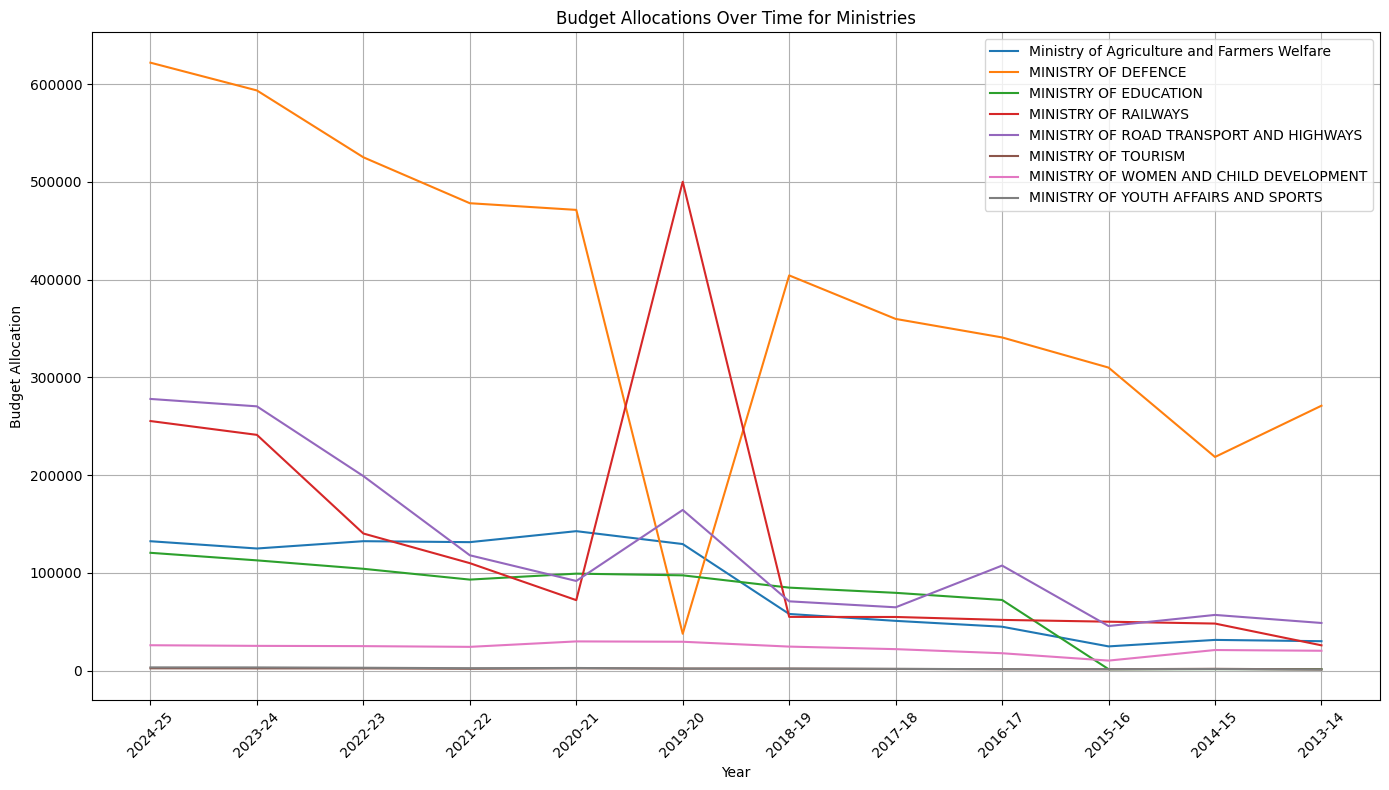

In [24]:
plt.figure(figsize=(14, 8))
for ministry in ministry_data.columns:
    plt.plot(ministry_data.index, ministry_data[ministry], label=ministry)

plt.title('Budget Allocations Over Time for Ministries')
plt.xlabel('Year')
plt.ylabel('Budget Allocation')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-26-78d8e872542b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ministry_data.columns, y=ministry_data.loc['2024-25'], palette=palette)


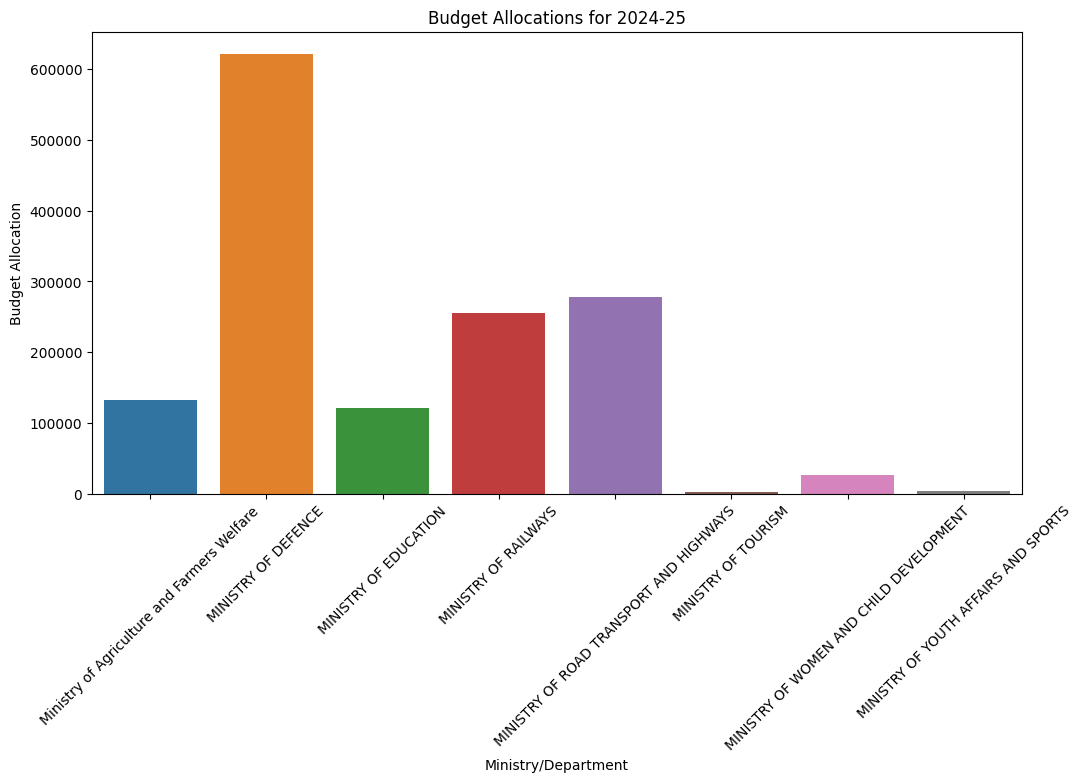

In [26]:
plt.figure(figsize=(12, 6))

# Create a color palette
palette = sns.color_palette("tab10", len(ministry_data.columns))

# Plot the bar chart with different colors
sns.barplot(x=ministry_data.columns, y=ministry_data.loc['2024-25'], palette=palette)

plt.title('Budget Allocations for 2024-25')
plt.xlabel('Ministry/Department')
plt.ylabel('Budget Allocation')
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-b4d4c4f371bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_data, x='Ministry/Department', y='Budget Allocation', palette=palette)


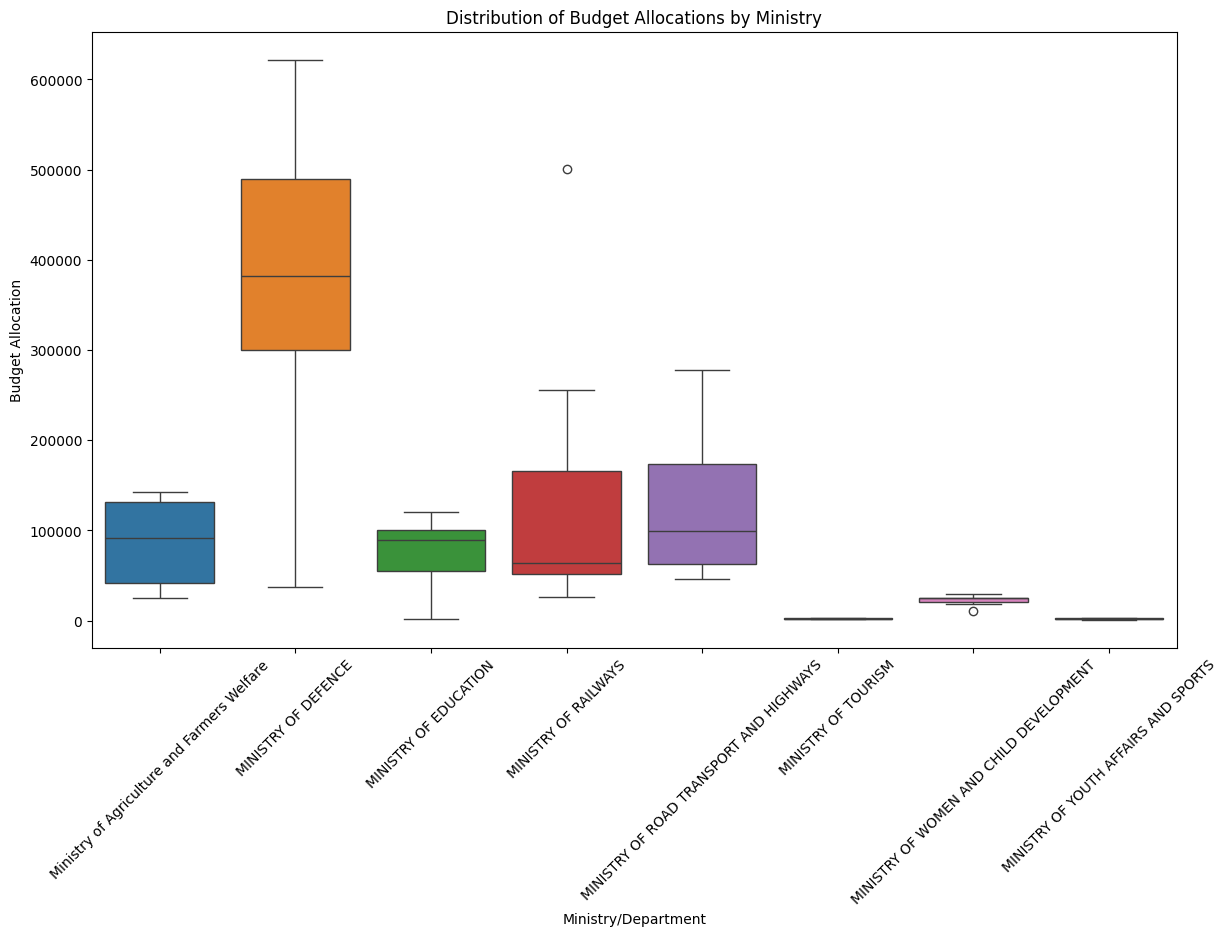

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_data, x='Ministry/Department', y='Budget Allocation', palette=palette)

plt.xticks(rotation=45)
plt.title('Distribution of Budget Allocations by Ministry')
plt.xlabel('Ministry/Department')
plt.ylabel('Budget Allocation')
plt.show()

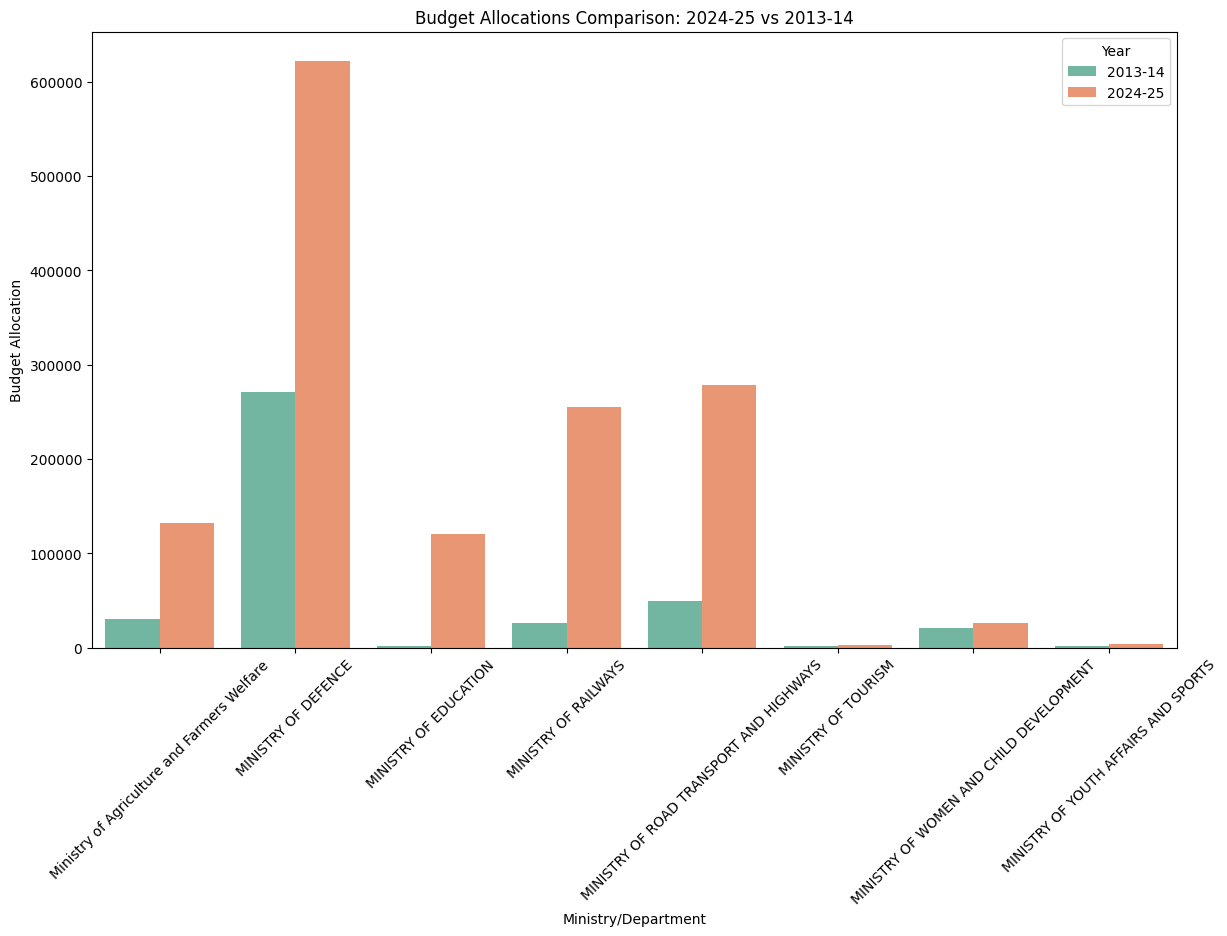

In [29]:
# Extract budget allocations for the years 2024-25 and 2013-14
comparison_data = data_cleaned.loc[:, ['2013-14', '2024-25']]

# Transpose the DataFrame for easier plotting
comparison_data = comparison_data.reset_index().melt(id_vars='Ministry/Department', var_name='Year', value_name='Budget Allocation')

# Set up the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison_data, x='Ministry/Department', y='Budget Allocation', hue='Year', palette='Set2')

plt.title('Budget Allocations Comparison: 2024-25 vs 2013-14')
plt.xlabel('Ministry/Department')
plt.ylabel('Budget Allocation')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


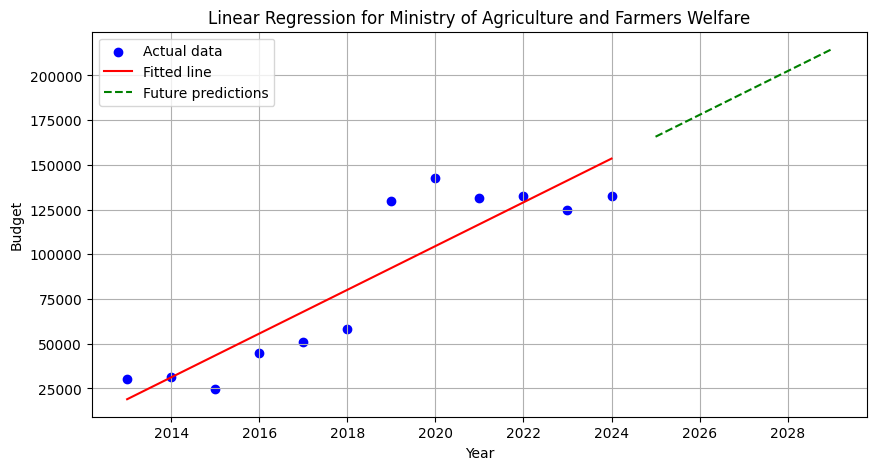

Ministry of Agriculture and Farmers Welfare - Slope: 12232.735769230765, Intercept: -24605550.83102563, R-squared: 0.8065696689322299
Predicted budgets for the next 5 years: [165739.10166667 177971.8374359  190204.57320513 202437.30897436
 214670.04474359]


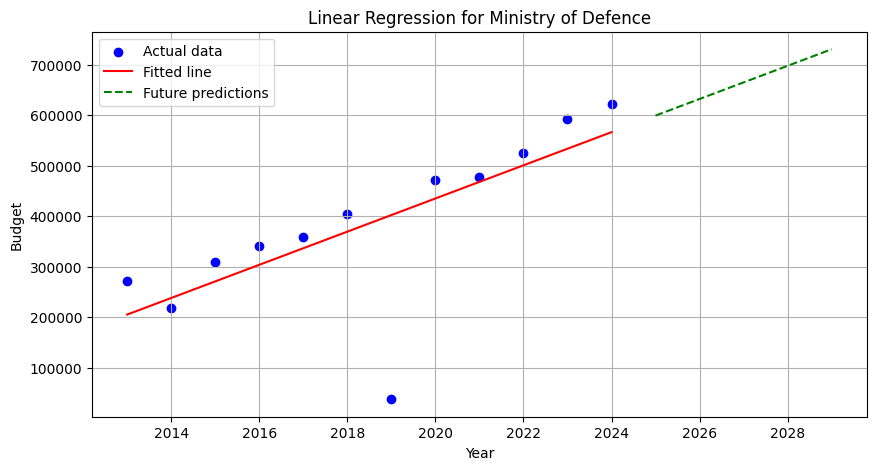

Ministry of Defence - Slope: 32844.29426573426, Intercept: -65910124.91705127, R-squared: 0.5055254233166893
Predicted budgets for the next 5 years: [599570.9710606  632415.26532634 665259.55959207 698103.8538578
 730948.14812354]


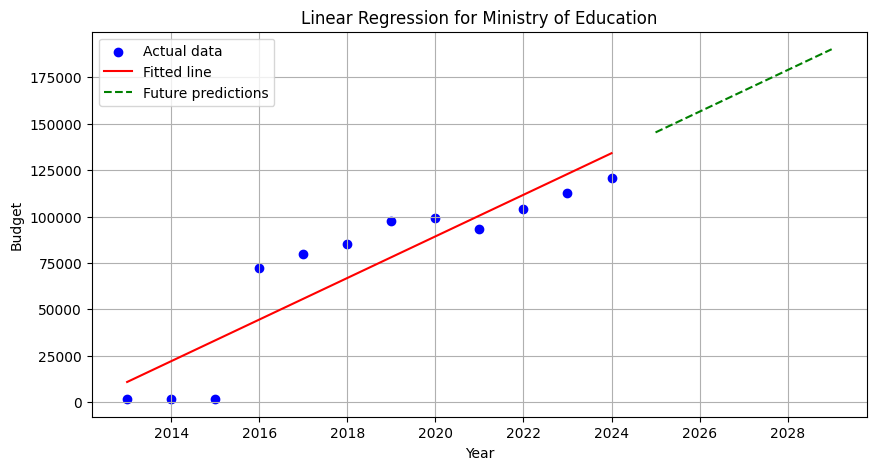

Ministry of Education - Slope: 11200.211783216777, Intercept: -22535124.771923065, R-squared: 0.815616689930376
Predicted budgets for the next 5 years: [145304.08909091 156504.30087413 167704.51265734 178904.72444056
 190104.93622378]


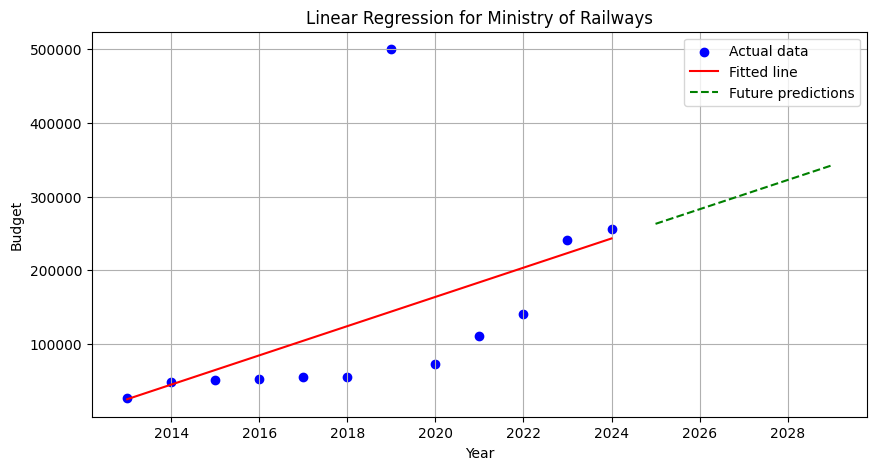

Ministry of Railways - Slope: 19855.33153846153, Intercept: -39944155.3653846, R-squared: 0.268501069291041
Predicted budgets for the next 5 years: [262891.         282746.33153846 302601.66307692 322456.99461538
 342312.32615384]


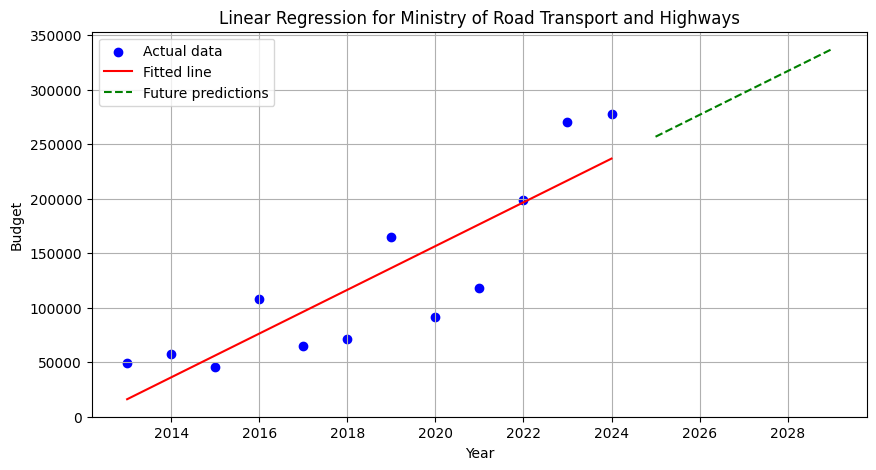

Ministry of Road Transport and Highways - Slope: 20072.93412587412, Intercept: -40390792.10474358, R-squared: 0.755629288370911
Predicted budgets for the next 5 years: [256899.50015152 276972.43427739 297045.36840326 317118.30252913
 337191.23665501]


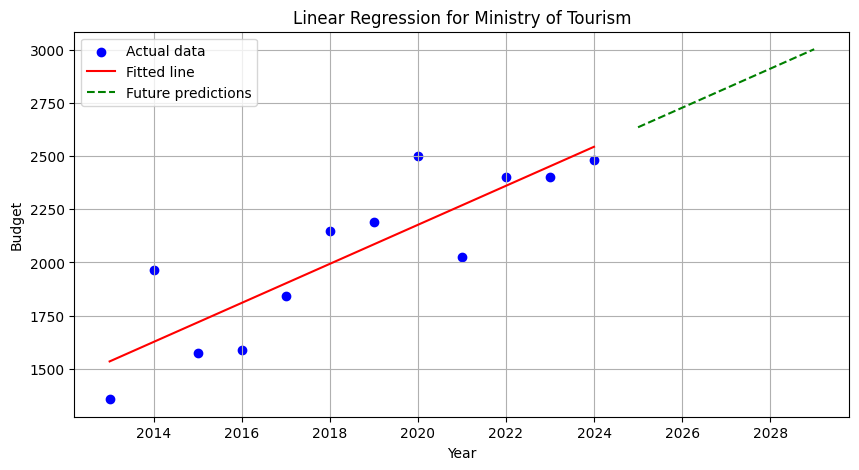

Ministry of Tourism - Slope: 91.72129370629366, Intercept: -183099.96384615375, R-squared: 0.7381335865540022
Predicted budgets for the next 5 years: [2635.65590909 2727.3772028  2819.0984965  2910.81979021 3002.54108392]


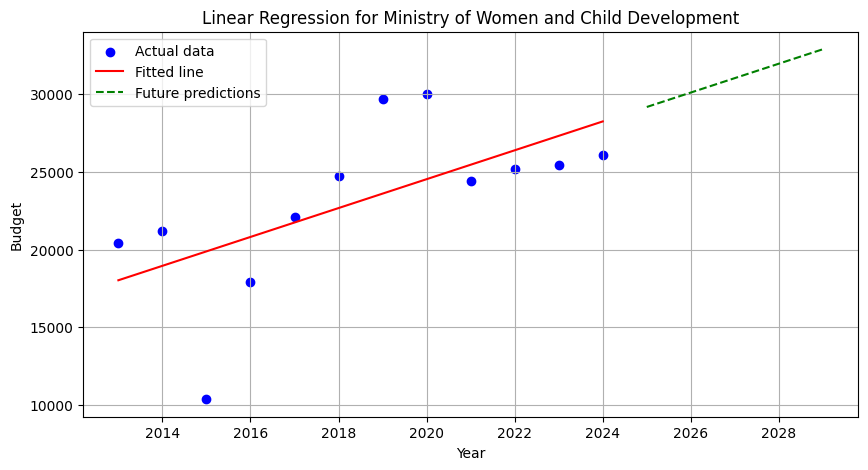

Ministry of Women and Child Development - Slope: 927.7401048951044, Intercept: -1849515.1275641017, R-squared: 0.39158241761222856
Predicted budgets for the next 5 years: [29158.58484848 30086.32495338 31014.06505827 31941.80516317
 32869.54526807]


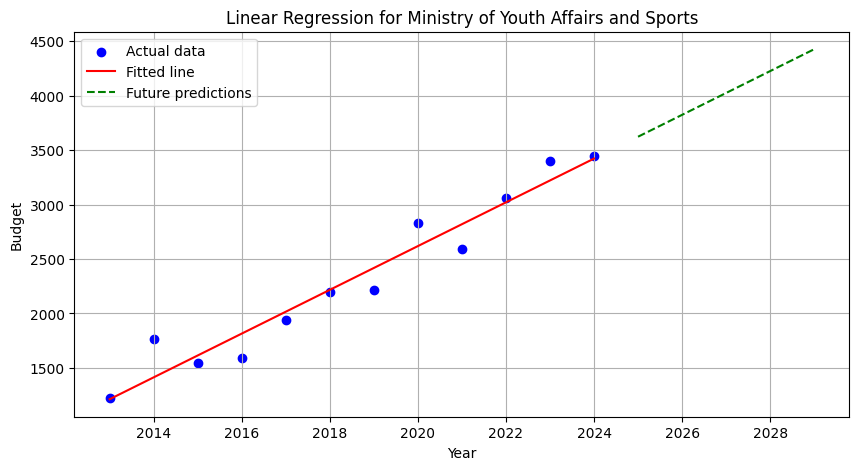

Ministry of Youth Affairs and Sports - Slope: 200.88842657342647, Intercept: -403176.37987179466, R-squared: 0.9421786644943798
Predicted budgets for the next 5 years: [3622.68393939 3823.57236597 4024.46079254 4225.34921911 4426.23764569]


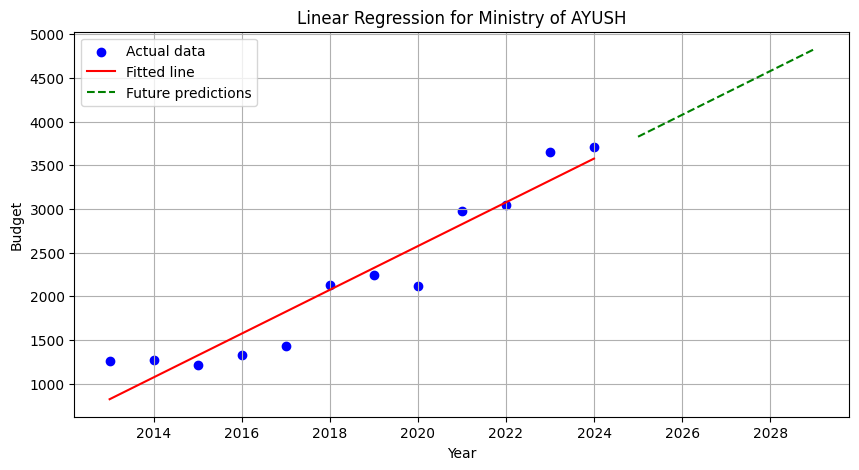

Ministry of AYUSH - Slope: 250.4695454545454, Intercept: -503374.53333333327, R-squared: 0.9164707208460072
Predicted budgets for the next 5 years: [3826.29621212 4076.76575758 4327.23530303 4577.70484848 4828.17439394]


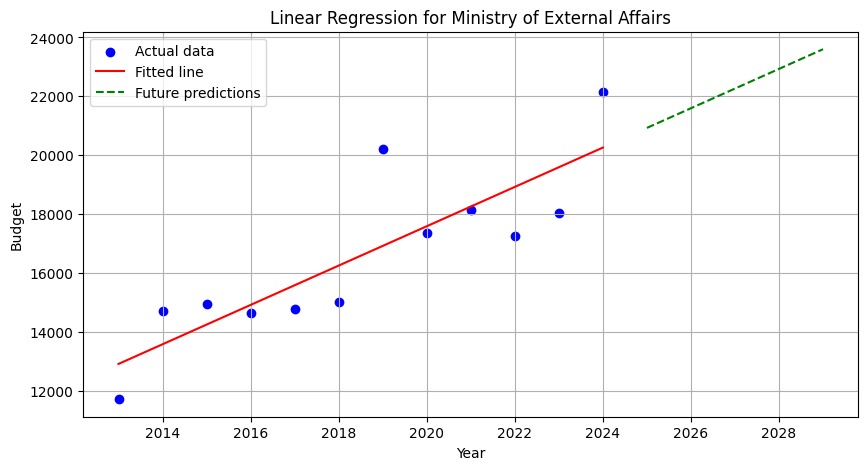

Ministry of External Affairs - Slope: 667.7422377622376, Intercept: -1331248.2119230763, R-squared: 0.716126862504495
Predicted budgets for the next 5 years: [20929.81954545 21597.56178322 22265.30402098 22933.04625874
 23600.7884965 ]


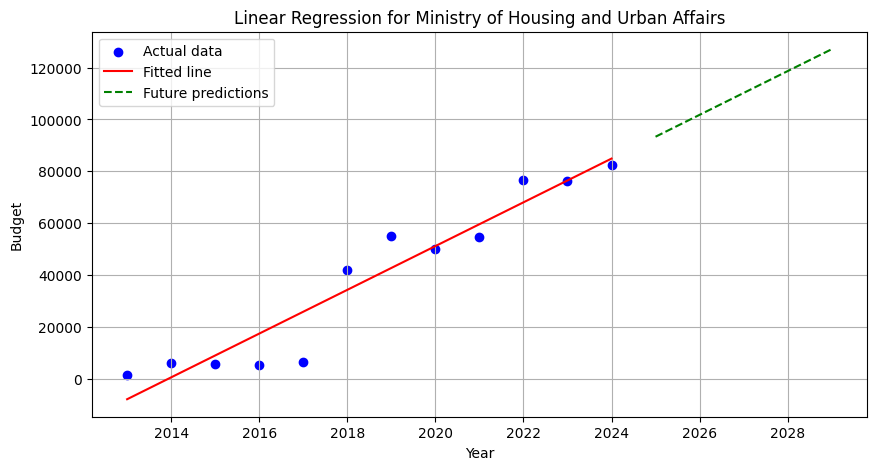

Ministry of Housing and Urban Affairs - Slope: 8435.139195804195, Intercept: -16987834.365897432, R-squared: 0.9135103673368953
Predicted budgets for the next 5 years: [ 93322.50560606 101757.64480187 110192.78399767 118627.92319348
 127063.06238928]


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to perform linear regression and plot
def analyze_ministry(years, budgets, ministry_name):
    # Reshape data
    years_reshaped = years.reshape(-1, 1)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(years_reshaped, budgets)

    # Predictions for existing years
    predictions = model.predict(years_reshaped)

    # Prepare future years for predictions
    future_years = np.array([2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(years, budgets, color='blue', label='Actual data')
    plt.plot(years, predictions, color='red', label='Fitted line')
    plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Future predictions')
    plt.xlabel('Year')
    plt.ylabel('Budget')
    plt.title(f'Linear Regression for {ministry_name}')
    plt.legend()
    plt.grid()
    plt.show()

    # Coefficients
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(years_reshaped, budgets)

    print(f'{ministry_name} - Slope: {slope}, Intercept: {intercept}, R-squared: {r_squared}')
    print(f'Predicted budgets for the next 5 years: {future_predictions}')

# Years data
years = np.array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

# Ministry budget data
ministry_data = {
    "Ministry of Agriculture and Farmers Welfare": [30223.88, 31542.95, 24909.78, 45035.2, 51026, 58080, 129585.21, 142762.35, 131531.19, 132513.62, 125035.79, 132469.86],
    "Ministry of Defence": [271076.13, 218654.64, 310079.6, 340921.98, 359854.12, 404364.71, 37827.16, 471378, 478195.62, 525166.15, 593537.64, 621940.95],
    "Ministry of Education": [1693.73, 1702.23, 1619.7, 72394, 79685.95, 85010.29, 97585.76, 99311.52, 93224.31, 104277.72, 112899.47, 120627.87],
    "Ministry of Railways": [26000, 48262, 50175, 52013, 55000, 55088, 500140.23, 72215.63, 110054.64, 140367.13, 241267.51, 255393],
    "Ministry of Road Transport and Highways": [48866.23, 57095.64, 45751.65, 107576, 64900, 71000, 164448.98, 91823.22, 118101, 199107.71, 270434.71, 278000],
    "Ministry of Tourism": [1357.3, 1966.71, 1573.07, 1590.32, 1840.77, 2150, 2189.22, 2499.83, 2026.77, 2400, 2400, 2479.62],
    "Ministry of Women and Child Development": [20440, 21193.88, 10382.4, 17908.12, 22094.67, 24700, 29664.9, 30007.1, 24435, 25172.28, 25448.75, 26092.19],
    "Ministry of Youth Affairs and Sports": [1219, 1769, 1541.13, 1592, 1943.21, 2196.35, 2216.92, 2826.92, 2596.14, 3062.6, 3397.32, 3442.32],
    "Ministry of AYUSH": [1259, 1272.15, 1214, 1326.2, 1428.65, 2130.8, 2245.76, 2122.08, 2970.3, 3050, 3647.5, 3712.49],
    "Ministry of External Affairs": [11719, 14730.39, 14966.83, 14662.66, 14798.55, 15011, 20229.4, 17346.71, 18154.73, 17250, 18050, 22154.67],
    "Ministry of Housing and Urban Affairs": [1468.02, 6008.62, 5634.47, 5411, 6406, 41765.13, 55057.44, 50039.9, 54581, 76549.46, 76431.6, 82576.57],
}

# Analyze each ministry
for ministry, budgets in ministry_data.items():
    analyze_ministry(years, np.array(budgets), ministry)
